Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7462 - loss: 0.9965 - val_accuracy: 0.9021 - val_loss: 0.3594
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9001 - loss: 0.3564 - val_accuracy: 0.9183 - val_loss: 0.2942
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9183 - loss: 0.2964 - val_accuracy: 0.9262 - val_loss: 0.2641
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9270 - loss: 0.2641 - val_accuracy: 0.9333 - val_loss: 0.2416
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9324 - loss: 0.2434 - val_accuracy: 0.9386 - val_loss: 0.2203
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.2555
Loss: 0.220
Accuracy: 0.939


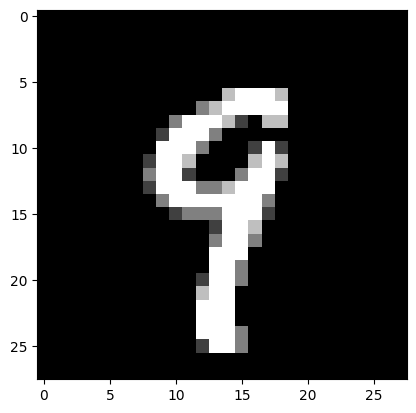

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Value: 9


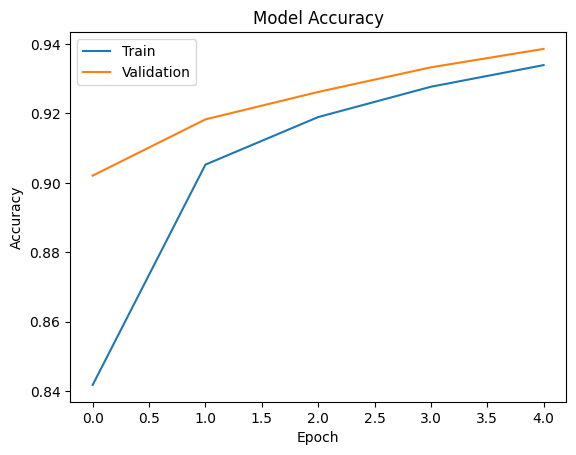

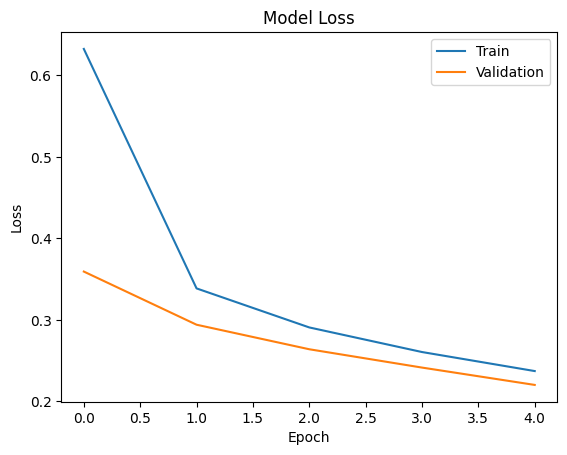

In [3]:
# a. IMPORTING NECESSARY PACKAGES
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

# b. LOAD THE TRAINING AND TESTING DATA (MNIST)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# c. DEFINE THE NETWORK ARCHITECTURE USING KERAS
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Display model architecture
model.summary()

# d. TRAIN THE MODEL USING SGD
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

# e. EVALUATE THE NETWORK
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: %.3f" % test_loss)
print("Accuracy: %.3f" % test_acc)

# Displaying a random test image and predicted value
n = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[n], cmap='gray')
plt.show()

predicted_value = model.predict(x_test)
print('Predicted Value:', predicted_value[n].argmax())

# f. PLOT THE TRAINING LOSS AND ACCURACY

# Plotting Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
